# PCA on IDS dataset

In [52]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset
ids_dataset = pd.read_csv("IDS_merged_dataset.csv")
ids_dataset.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2852\1319772336.py:2: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  ids_dataset = pd.read_csv("IDS_merged_dataset.csv")


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,4.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,03/07/2017 08:56:22,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [3]:
# dataset information
ids_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [4]:
# Dataset columns
ids_dataset.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [5]:
# dropping unwanted columns
columns_to_be_dropped = [
    'Flow ID', 
    ' Source IP', 
    ' Source Port',
    ' Destination IP', 
    ' Destination Port', 
    ' Protocol', 
    ' Timestamp',
    ' Label'
]

pre_pca_ids_dataset = ids_dataset.drop(columns_to_be_dropped, axis=1)
pre_pca_ids_dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pre_pca_ids_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 77 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Flow Duration                float64
 1    Total Fwd Packets            float64
 2    Total Backward Packets       float64
 3   Total Length of Fwd Packets   float64
 4    Total Length of Bwd Packets  float64
 5    Fwd Packet Length Max        float64
 6    Fwd Packet Length Min        float64
 7    Fwd Packet Length Mean       float64
 8    Fwd Packet Length Std        float64
 9   Bwd Packet Length Max         float64
 10   Bwd Packet Length Min        float64
 11   Bwd Packet Length Mean       float64
 12   Bwd Packet Length Std        float64
 13  Flow Bytes/s                  float64
 14   Flow Packets/s               float64
 15   Flow IAT Mean                float64
 16   Flow IAT Std                 float64
 17   Flow IAT Max                 float64
 18   Flow IAT Min         

In [7]:
# 5 summary of dataset
pre_pca_ids_dataset.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,7.900000e+01,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,2.800000e+02,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


<AxesSubplot: >

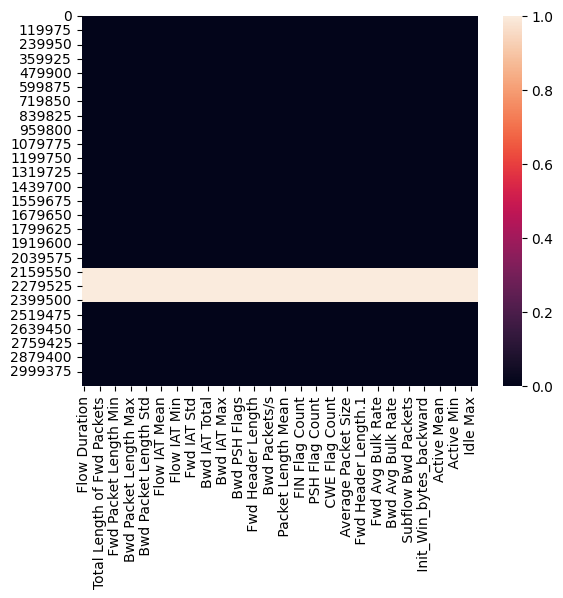

In [22]:
sns.heatmap(pre_pca_ids_dataset.isna())

In [8]:
pre_pca_ids_dataset.shape

(3119345, 77)

In [9]:
# Dropping missing values
pre_pca_ids_dataset.dropna(inplace=True)

In [10]:
pre_pca_ids_dataset.shape

(2829385, 77)

In [11]:
3119345 - 2829385

289960

In [38]:
# Converting infinity to nan
pre_pca_ids_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
# Dropping na
pre_pca_ids_dataset.dropna(inplace=True)

In [42]:
pre_pca_ids_dataset.shape

(2827876, 77)

In [43]:
2829385 - 2827876

1509

In [44]:
# Scaling dataset
scaler = StandardScaler()
scaled_pre_pca_dataset = scaler.fit_transform(pre_pca_ids_dataset)

In [47]:
# Applying PCA on dataset
# Creating a PCA object
pca = PCA(n_components=77)

In [50]:
# Performing PCA
pcaed = pca.fit_transform(scaled_pre_pca_dataset)

array([[-2.10211541e+00, -5.28426760e-02,  4.71194027e-01, ...,
         4.37399597e-17,  5.50781413e-17, -1.35247589e-16],
       [-2.54814952e+00, -6.99309874e-02,  7.16102896e-01, ...,
        -1.58615133e-19,  5.96347708e-19, -7.73213207e-20],
       [-2.54814952e+00, -6.99309864e-02,  7.16102896e-01, ...,
        -3.38222483e-16, -2.85864119e-16,  7.48756311e-18],
       ...,
       [ 2.94423871e+00,  6.02086632e-01, -5.21134583e+00, ...,
         3.83566309e-20,  6.14305156e-20,  1.34493601e-19],
       [ 1.98489279e+00,  4.52754877e-01, -4.20075751e+00, ...,
         1.11725219e-18,  1.63483078e-18, -1.38650255e-18],
       [ 1.97782309e+00,  4.39646256e-01, -4.19086062e+00, ...,
         1.28783108e-18,  1.89683219e-18, -1.59551616e-18]])

In [51]:
pca.explained_variance_ratio_

array([2.19073615e-01, 1.04094530e-01, 8.65244601e-02, 5.99275603e-02,
       4.64527205e-02, 4.40692846e-02, 3.71909455e-02, 3.48395438e-02,
       3.35307803e-02, 2.90657761e-02, 2.89277092e-02, 2.80752449e-02,
       2.37307931e-02, 2.23256486e-02, 2.09008302e-02, 1.84292829e-02,
       1.84140985e-02, 1.72887165e-02, 1.50557797e-02, 1.38218945e-02,
       1.31992899e-02, 1.25431226e-02, 1.17743747e-02, 1.07084894e-02,
       8.71022862e-03, 8.31623654e-03, 6.41485984e-03, 4.53888263e-03,
       4.02445684e-03, 3.71302120e-03, 2.64461775e-03, 2.36406157e-03,
       1.65501210e-03, 1.46235237e-03, 1.44386791e-03, 1.16041181e-03,
       9.04672510e-04, 6.01868424e-04, 3.93515399e-04, 3.38051081e-04,
       2.71387347e-04, 2.20564862e-04, 1.88084532e-04, 1.67901610e-04,
       1.47404410e-04, 9.44777294e-05, 5.19695041e-05, 4.17290026e-05,
       3.67598267e-05, 3.15891923e-05, 2.74499332e-05, 1.75852029e-05,
       1.45154559e-05, 1.16458328e-05, 7.79696468e-06, 6.65422298e-06,
      

In [56]:
1.04094530e-01 + 2.19073615e-01

0.323168145

In [55]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21907362, 0.32316815, 0.40969261, 0.46962017, 0.51607289,
       0.56014217, 0.59733312, 0.63217266, 0.66570344, 0.69476922,
       0.72369693, 0.75177217, 0.77550296, 0.79782861, 0.81872944,
       0.83715873, 0.85557282, 0.87286154, 0.88791732, 0.90173922,
       0.91493851, 0.92748163, 0.939256  , 0.94996449, 0.95867472,
       0.96699096, 0.97340582, 0.9779447 , 0.98196916, 0.98568218,
       0.9883268 , 0.99069086, 0.99234587, 0.99380822, 0.99525209,
       0.9964125 , 0.99731717, 0.99791904, 0.99831256, 0.99865061,
       0.998922  , 0.99914256, 0.99933065, 0.99949855, 0.99964595,
       0.99974043, 0.9997924 , 0.99983413, 0.99987089, 0.99990248,
       0.99992993, 0.99994751, 0.99996203, 0.99997367, 0.99998147,
       0.99998812, 0.9999928 , 0.99999678, 0.9999989 , 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

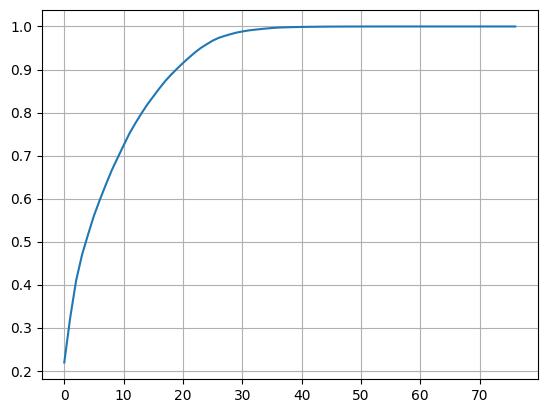

In [58]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [59]:
# pca 25
pca25 = PCA(n_components=25)
pca25_data = pca25.fit_transform(pre_pca_ids_dataset)

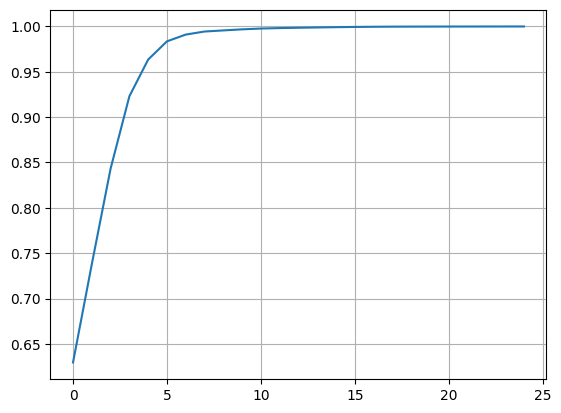

In [60]:
plt.plot(np.cumsum(pca25.explained_variance_ratio_))
plt.grid()